<br><br>
<a id='Header' style="font-size:25px; color:#1D2951; text-decoration:none; text-align:center;"><center><b> Retail Analytics: Enhancing KPIs and Performance Optimization </b></center></a>

<br/><br/>

<a id='Header' style="font-size:22px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#intro" style="font-size:15px; color:#1D2951">Introduction</a></li>
<li><a href="#eda" style="font-size:15px; color:#1D2951">Exploratory Data Analysis</a></li>
<li><a href="#dataset1" style="font-size:15px; color:#1D2951">Dataset 1</a></li>
<li><a href="#dataset2" style="font-size:15px; color:#1D2951">Dataset 2</a></li>
</ul>
<br>
<hr>

### Starting by importing packages

In [1]:
# libraries used and additional useful class for debugging
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from pandasql import sqldf
import pandasql as ps
import seaborn as sns
import pandas as pd
# import numpy as np
import datetime as dt


import warnings
warnings.filterwarnings("ignore")

# pip install pmdarima

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')

%matplotlib inline

In [2]:
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

<a id='intro' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

### In this case study, we will focus on analyzing various aspects of retail operations and performance. The following key areas will be explored:

<p style="font-size:15px"> •  Total Monthly Retention Rate: Calculate the retention rate for May, specifically customers retained from April. Additionally, analyze the retention rate for each channel and provide recommendations on enhancing this important KPI.  </p>

<p style="font-size:15px"> •  Percentage Growth of May over April: Assess the percentage growth of May in terms of the number of orders, distinct retailers, average order price, and total revenues (sum of order price) for each district. Identify the top 5 and least 5 districts based on revenue growth. Based on the analysis, determine districts to capitalize on and districts that should be considered for closure, providing reasoning for these recommendations.  </p>

<p style="font-size:15px"> •  Total Monthly Burn: Calculate the burn rate (total expenses) for April and May and propose techniques to decrease the burn specifically related to discounts.  </p>

<p style="font-size:15px"> •  Weekly Percentage Contribution by Channel: Calculate the weekly percentage contribution of each channel to the total weekly orders for April and May.  </p>

<p style="font-size:15px"> •  App Users and Telesales Users: Calculate the monthly percentage of app users and telesales users among the total retailers in May, based on specified criteria. Suggest techniques to increase the percentage of app users.  </p>

<p style="font-size:15px"> •  Projection of Total Sales Orders and Revenues: Calculate the projection of total sales orders and revenues for the remaining days of June, both on an individual retailer basis and for the entire month, using reasonable assumptions.  </p>

<p style="font-size:15px"> •  Sales, COGS, and Margin Analysis: Analyze total sales, cost of goods sold (COGS), and margin per SKU, category, super category, and sector.  </p>

<p style="font-size:15px"> •  Days on Hand (DOH) Calculation: Consider the stock snapshot and sales data per SKU to calculate the days on hand (time remaining until SKUs run out of stock) at the end of each day.  </p>

<p style="font-size:15px"> •  Recalculating Margins and DOH: Reevaluate the previously mentioned margins and DOH when the prices of certain SKUs decrease by 5% and others increase by 3%.  </p>

In [3]:
# load datasets
dataset1 = pd.read_excel('dataset1.xlsx')
dataset2 = pd.read_excel('dataset2.xlsx')

<a id='eda' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Exploratory Data Analysis</b></a>

In [4]:
dataset1.head(3)

,week,month,creation_date,sales_order_id,retailer_id,sales_order_status,channel,district_ar,order_price_before_discount,discount
0,14,4,2020-04-01,1,18564,Delivered,Application,العمرانية,2119.75,0.00
1,14,4,2020-04-01,5,28140,Delivered,Application,ميت عقبة,2242.75,0.10
2,14,4,2020-04-01,9,32552,Canceled,Application,مدينة السلام,1094.50,8.65


In [5]:
print(f'{Color.RED}Dateset1 Info: {Color.END}\n')
dataset1.info()

Dateset1 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21716 entries, 0 to 21715
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   week                         21716 non-null  int64  
 1   month                        21716 non-null  int64  
 2   creation_date                21716 non-null  object 
 3   sales_order_id               21716 non-null  int64  
 4   retailer_id                  21716 non-null  int64  
 5   sales_order_status           21716 non-null  object 
 6   channel                      21716 non-null  object 
 7   district_ar                  21716 non-null  object 
 8   order_price_before_discount  21716 non-null  float64
 9   discount                     21716 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.7+ MB


In [6]:
dataset1['creation_date'] = dataset1['creation_date'].astype('datetime64[ns]')

---

### Helpful methods

In [7]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [8]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display


def fix_arabic_encodings(arabic_list):
    fixed_arabic_list = [ ]

    for item in arabic_list:
        fixed_arabic_list.append(get_display(arabic_reshaper.reshape(item)))
    
    return fixed_arabic_list

---

In [9]:
query = '''
        SELECT *
        FROM dataset1
        LIMIT 5
        '''
x = ps.sqldf(query)
x

,week,month,creation_date,sales_order_id,retailer_id,sales_order_status,channel,district_ar,order_price_before_discount,discount
0,14,4,2020-04-01 00:00:00.000000,1,18564,Delivered,Application,العمرانية,2119.75,0.00
1,14,4,2020-04-01 00:00:00.000000,5,28140,Delivered,Application,ميت عقبة,2242.75,0.10
2,14,4,2020-04-01 00:00:00.000000,9,32552,Canceled,Application,مدينة السلام,1094.50,8.65
3,14,4,2020-04-01 00:00:00.000000,13,19299,Delivered,Application,ميت عقبة,3448.50,24.51
4,14,4,2020-04-01 00:00:00.000000,17,5901,Delivered,Application,المطرية,910.95,0.10


In [10]:
dataset1['month'].value_counts()

4    8661
5    8257
6    4798
Name: month, dtype: int64

In [11]:
dataset1['channel'].value_counts()

Application    17072
salesagent      2750
telesales       1894
Name: channel, dtype: int64

In [12]:
dataset1['sales_order_status'].value_counts()

Delivered    18359
Canceled      2635
Failed         722
Name: sales_order_status, dtype: int64

In [13]:
dataset1.describe()

,week,month,sales_order_id,retailer_id,order_price_before_discount,discount
count,21716.000000,21716.000000,21716.000000,21716.000000,21716.000000,21716.000000
mean,19.484159,4.822113,43437.757045,20988.390265,2693.985795,22.460451
std,3.168414,0.766914,25083.208701,10079.536669,2846.352115,37.675371
min,14.000000,4.000000,1.000000,68.000000,-8168.400000,0.000000
25%,17.000000,4.000000,21718.000000,13142.000000,1085.250000,0.100000
50%,19.000000,5.000000,43434.000000,20998.000000,1845.900000,10.635000
75%,22.000000,5.000000,65157.000000,29034.000000,3245.500000,30.280000
max,25.000000,6.000000,86888.000000,40778.000000,68066.510000,1118.690000


<a id='dataset1' style="font-size:25px; color:#1D2951; text-decoration:none;"><b>Dataset 1</b></a>

### 1.  Calculate the total monthly retention rate for May (customers retained from April) and retention rate for every channel

In [14]:
query = '''
    WITH base AS
     (SELECT DISTINCT retailer_id,
             month AS order_month,
             channel
      FROM dataset1
      WHERE sales_order_status = 'Delivered'),
      
    lagged_data AS
    (SELECT *,
            LAG(order_month) OVER(PARTITION BY retailer_id, channel ORDER BY order_month) AS lagged_month
     FROM base),
     
    diff_data AS
    (SELECT *,
            Cast((JulianDay(order_month) - JulianDay(lagged_month)) As Integer) AS date_diff
     FROM lagged_data),
     
    main AS
    (SELECT *,
            CASE WHEN date_diff IS NULL THEN 'NEW'
                 WHEN date_diff = 1 THEN 'RETAINED'
                 WHEN date_diff > 1 THEN 'REACTIVATED'
            END AS status
     FROM diff_data),
     
    base_status AS
    (SELECT order_month,
            channel,
            COUNT(DISTINCT retailer_id) AS retailers,
            SUM(CASE WHEN status = 'NEW' THEN 1 END) AS new,
            SUM(CASE WHEN status = 'RETAINED' THEN 1 END) AS retained,
            SUM(CASE WHEN status = 'REACTIVATED' THEN 1 END) AS reactivated
            
     FROM main
     GROUP BY 1,2)
     
SELECT  *,
        (retained * 1.0) / LAG(retailers, 1) OVER(PARTITION BY channel ORDER BY order_month) AS retention
FROM base_status
ORDER BY order_month
'''
retention_MoM = ps.sqldf(query)
retention_MoM

,order_month,channel,retailers,new,retained,reactivated,retention
0,4,Application,3637,3637,NaN,NaN,NaN
1,4,salesagent,431,431,NaN,NaN,NaN
2,4,telesales,564,564,NaN,NaN,NaN
3,5,Application,3372,1682,1690.0,NaN,0.464669
4,5,salesagent,891,865,26.0,NaN,0.060325
5,5,telesales,461,254,207.0,NaN,0.367021
6,6,Application,2214,710,1179.0,325.0,0.349644
7,6,salesagent,821,677,125.0,19.0,0.140292
8,6,telesales,300,123,125.0,52.0,0.271150


In [15]:
may_retention = retention_MoM[retention_MoM['order_month'] == 5]
may_retention

,order_month,channel,retailers,new,retained,reactivated,retention
3,5,Application,3372,1682,1690.0,NaN,0.464669
4,5,salesagent,891,865,26.0,NaN,0.060325
5,5,telesales,461,254,207.0,NaN,0.367021


### Recommendations on how we can enhance the retention

As it can be seen, the retention rate for sales agent is too low by 6%, we can enhance the churn by getting more data on sales agent performance such as numbers of targets and follow-up, applying periodical assessment and we can directly get feedback from merchants to analysis their behaviors and overcome their issues with sales agents. It can be misleading as we don't know for sure if clients moved from sales agents to using application or they just quit so we have to track these customers to find out for sure what the actual retention is.

<div align="center">
    <span style="font-weight: bold;">MAY</span>
</div>

|  | retailers | Retention | orders | rev. | ats |
| --- | --- | --- | --- | --- | --- |
| **Application** | 3372 | 46 % | 5215 | 1.425915e+07 | 2734.3 |
| **Salesagent** | 891 | 6 % | 927 | 1.626314e+06 | 1754.4 |
| **Telesales** | 461 | 36 % | 620 | 1.856760e+06 | 2994.8 |



On the other hand, **a set of suggestions can be applied for all channels to improve this KPI** such as:   

    • launch a loyalty program that awards the retailers: based on the rate and number of orders,
    the volume of orders, how long the retailers were using our services, etc.

    • applying customized offers/deals based on the retailer's ordering history and behavior.

    • Launch a referral program that encourage retailers to recommend our brand for getting rewards. 

    • Gathering more data to apply advance analytics such as (survey, calls, bot) 

    • Increase telesales awareness with our services by introducing education programs.

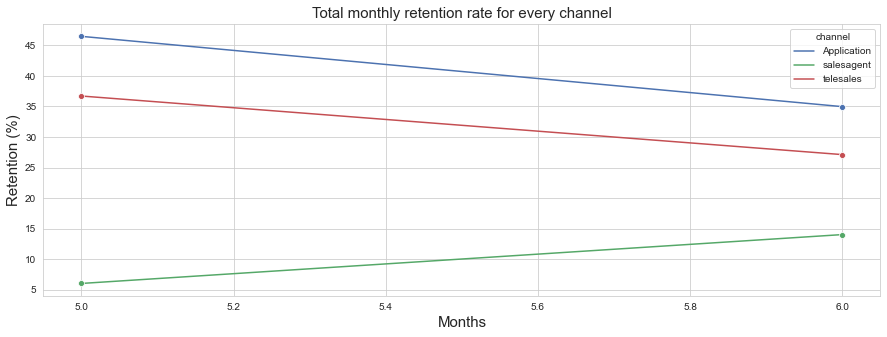

In [16]:
retention_MoM['retention'] = retention_MoM['retention'] * 100

plt.figure(figsize=(15,5))
sns.lineplot(x="order_month", y="retention", hue="channel", data=retention_MoM, marker="o")
plt.xlabel('Months',fontsize=15)
plt.ylabel('Retention (%)',fontsize=15)
plt.title('Total monthly retention rate for every channel', fontsize=15);

###  Monthy cohort analysis:

In [17]:
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)

def get_date_elements(df, column):
    month = df[column].dt.month
    year = df[column].dt.year
    return month, year 

#apply the function 
dataset1['date_month'] = dataset1['creation_date'].apply(get_month)
dataset1['cohort_month'] =  dataset1.groupby(['retailer_id'])['date_month'].transform('min')

# get date elements for our cohort columns
Date_month, Date_year =  get_date_elements(dataset1,'date_month')
Cohort_month,Cohort_year =  get_date_elements(dataset1,'cohort_month')

#create a cohort index 
year_diff = Date_year - Cohort_year
month_diff = Date_month - Cohort_month
dataset1['cohort_index'] = (year_diff * 12) + month_diff + 1
dataset1.head()

,week,month,creation_date,sales_order_id,retailer_id,sales_order_status,channel,district_ar,order_price_before_discount,discount,date_month,cohort_month,cohort_index
0,14,4,2020-04-01,1,18564,Delivered,Application,العمرانية,2119.75,0.00,2020-04-01,2020-04-01,1
1,14,4,2020-04-01,5,28140,Delivered,Application,ميت عقبة,2242.75,0.10,2020-04-01,2020-04-01,1
2,14,4,2020-04-01,9,32552,Canceled,Application,مدينة السلام,1094.50,8.65,2020-04-01,2020-04-01,1
3,14,4,2020-04-01,13,19299,Delivered,Application,ميت عقبة,3448.50,24.51,2020-04-01,2020-04-01,1
4,14,4,2020-04-01,17,5901,Delivered,Application,المطرية,910.95,0.10,2020-04-01,2020-04-01,1


In [18]:
cohort_data = dataset1.groupby(['cohort_month', 'cohort_index'])['retailer_id'].apply(pd.Series.nunique).reset_index()
cohort_table = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='retailer_id')

cohort_table

cohort_index,1,2,3
cohort_month,,,
2020-04-01,5004.0,2377.0,1544.0
2020-05-01,2881.0,740.0,NaN
2020-06-01,1391.0,NaN,NaN


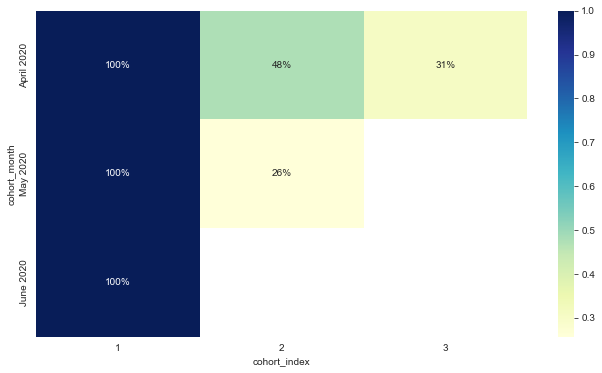

In [19]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_size = cohort_table.iloc[:,0]
retention = cohort_table.divide(cohort_size,axis=0)
# #visualize our results in heatmap
plt.figure(figsize=(11,6))
sns.heatmap(retention,annot=True,cmap='YlGnBu',fmt='.0%');

---

### 2.  Calculate the percentage growth of May over April for every district in terms of number of orders, distinct retailers, average order price, total revenues (sum of order price) 

###### Top Districts with Rev. Growth:

In [20]:
query = '''
WITH base AS 
    (SELECT  month,
             district_ar,
             COUNT(DISTINCT sales_order_id) AS number_of_orders,
             COUNT(DISTINCT retailer_id) AS no_of_retailers,
             SUM(order_price_before_discount) AS total_revenues,
             AVG(order_price_before_discount) AS average_order_price
    FROM dataset1
    GROUP by 1,2),

lagged_data as 
(SELECT month,
        number_of_orders,
        district_ar,
        no_of_retailers,
        total_revenues,
        average_order_price,
        LAG(number_of_orders) OVER (PARTITION BY district_ar order by month) AS lagged_number_of_orders,
        LAG(no_of_retailers) OVER (PARTITION BY district_ar order by month) AS lagged_no_of_retailers,
        LAG(total_revenues) OVER (PARTITION BY district_ar order by month) AS lagged_total_revenues,
        LAG(average_order_price) OVER (PARTITION BY district_ar order by month) AS lagged_average_order_price

From base
WHERE month IN (4,5))

SELECT  month,
        district_ar,
        total_revenues,
        ((number_of_orders - lagged_number_of_orders) * 1.0 / (lagged_number_of_orders)) * 100 AS pct_grwth_no_of_orders,
        ((no_of_retailers - lagged_no_of_retailers) * 1.0 / (lagged_no_of_retailers)) * 100 AS pct_grwth_no_of_retailers,
        ((total_revenues - lagged_total_revenues) * 1.0 / (lagged_total_revenues)) * 100 AS pct_grwth_total_revenues,
        ((average_order_price - lagged_average_order_price) * 1.0 / (lagged_average_order_price)) * 100 AS pct_grwth_avg_order_prices
        
FROM lagged_data
WHERE month = 5 AND pct_grwth_total_revenues IS NOT NULL
ORDER BY 6 DESC
-- LIMIT 12
 '''
top_districts_with_rev_grwth = ps.sqldf(query)
top_districts_with_rev_grwth

,month,district_ar,total_revenues,pct_grwth_no_of_orders,pct_grwth_no_of_retailers,pct_grwth_total_revenues,pct_grwth_avg_order_prices
0,5,شبين القناطر,5218.25,200.000000,0.000000,231.107234,10.369078
1,5,قلج,143201.25,77.777778,100.000000,55.565385,-12.494471
2,5,بلقس,45629.35,88.888889,42.857143,50.780763,-20.174890
3,5,الخانكة,100887.04,55.555556,100.000000,46.508028,-5.816267
4,5,القناطر الخيرية,255866.33,12.328767,-7.142857,22.773148,9.298046
...,...,...,...,...,...,...,...
59,5,الوايلي,94570.85,-45.901639,-32.142857,-53.135958,-13.372528
60,5,النزهة الجديدة,65362.46,-39.285714,-35.294118,-59.250471,-32.883129
61,5,ميت حلفا,12225.10,-40.000000,0.000000,-70.961447,-51.602412
62,5,مساكن شيراتون,7919.90,-66.666667,-37.500000,-83.115196,-49.345588


###### Least Districts with Rev. Growth:

In [21]:
query = '''
WITH base AS 
    (SELECT  month,
             district_ar,
             COUNT(DISTINCT sales_order_id) AS number_of_orders,
             COUNT(DISTINCT retailer_id) AS no_of_retailers,
             SUM(order_price_before_discount) AS total_revenues,
             AVG(order_price_before_discount) AS average_order_price
    FROM dataset1
    GROUP by 1,2),

lagged_data as 
(SELECT month,
        number_of_orders,
        district_ar,
        no_of_retailers,
        total_revenues,
        average_order_price,
        LAG(number_of_orders) OVER (PARTITION BY district_ar order by month) AS lagged_number_of_orders,
        LAG(no_of_retailers) OVER (PARTITION BY district_ar order by month) AS lagged_no_of_retailers,
        LAG(total_revenues) OVER (PARTITION BY district_ar order by month) AS lagged_total_revenues,
        LAG(average_order_price) OVER (PARTITION BY district_ar order by month) AS lagged_average_order_price

From base
WHERE month IN (4,5))

SELECT  month,
        district_ar,
        total_revenues,
        ((number_of_orders - lagged_number_of_orders) * 1.0 / (lagged_number_of_orders)) * 100 AS pct_grwth_no_of_orders,
        ((no_of_retailers - lagged_no_of_retailers) * 1.0 / (lagged_no_of_retailers)) * 100 AS pct_grwth_no_of_retailers,
        ((total_revenues - lagged_total_revenues) * 1.0 / (lagged_total_revenues)) * 100 AS pct_grwth_total_revenues,
        ((average_order_price - lagged_average_order_price) * 1.0 / (lagged_average_order_price)) * 100 AS pct_grwth_avg_order_prices
        
FROM lagged_data
WHERE month = 5 AND pct_grwth_total_revenues IS NOT NULL
ORDER BY 6 ASC
-- LIMIT 12
 '''
least_districts_with_rev_grwth = ps.sqldf(query)
least_districts_with_rev_grwth

,month,district_ar,total_revenues,pct_grwth_no_of_orders,pct_grwth_no_of_retailers,pct_grwth_total_revenues,pct_grwth_avg_order_prices
0,5,عمرانيه 3,5136.75,-75.000000,-63.636364,-89.506740,-58.026959
1,5,مساكن شيراتون,7919.90,-66.666667,-37.500000,-83.115196,-49.345588
2,5,ميت حلفا,12225.10,-40.000000,0.000000,-70.961447,-51.602412
3,5,النزهة الجديدة,65362.46,-39.285714,-35.294118,-59.250471,-32.883129
4,5,الوايلي,94570.85,-45.901639,-32.142857,-53.135958,-13.372528
...,...,...,...,...,...,...,...
59,5,القناطر الخيرية,255866.33,12.328767,-7.142857,22.773148,9.298046
60,5,الخانكة,100887.04,55.555556,100.000000,46.508028,-5.816267
61,5,بلقس,45629.35,88.888889,42.857143,50.780763,-20.174890
62,5,قلج,143201.25,77.777778,100.000000,55.565385,-12.494471


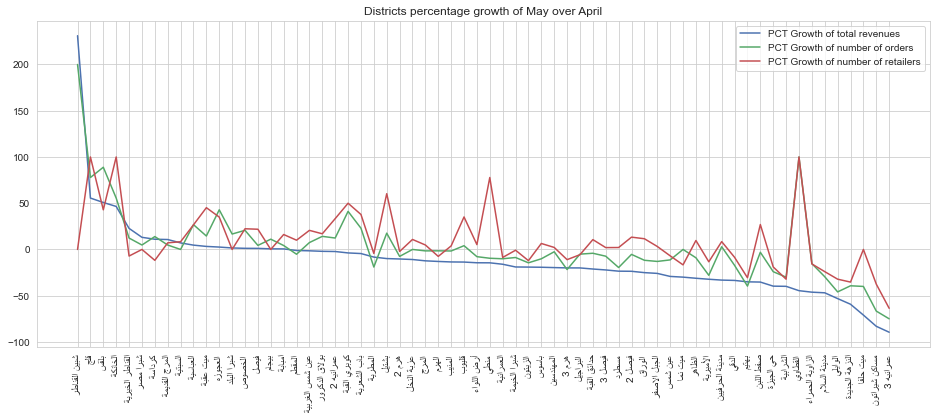

In [22]:
plt.figure(figsize=(16,6))

plt.title('Districts percentage growth of May over April')
plt.plot(top_districts_with_rev_grwth['district_ar'], top_districts_with_rev_grwth['pct_grwth_total_revenues'], label='PCT Growth of total revenues')
plt.plot(top_districts_with_rev_grwth['district_ar'], top_districts_with_rev_grwth['pct_grwth_no_of_orders'], label='PCT Growth of number of orders')
plt.plot(top_districts_with_rev_grwth['district_ar'], top_districts_with_rev_grwth['pct_grwth_no_of_retailers'], label='PCT Growth of number of retailers')

plt.legend()

xlabels = fix_arabic_encodings(top_districts_with_rev_grwth['district_ar'])
xi = list(range(len(xlabels)))
plt.xticks(xi, xlabels, rotation = 90)

plt.show()

In [23]:
# TESTING
query = '''
        SELECT  district_ar,
                month,
                COUNT(DISTINCT sales_order_id) AS number_of_orders,
                COUNT(DISTINCT retailer_id) AS no_of_retailers,
                SUM(order_price_before_discount) AS total_revenues,
                AVG(order_price_before_discount) AS average_order_price,
                SUM(discount) AS total_burn

        FROM dataset1
        WHERE district_ar = 'شبين القناطر'
        GROUP by 1,2
        ORDER BY 3 desc'''

x = ps.sqldf(query)
x

,district_ar,month,number_of_orders,no_of_retailers,total_revenues,average_order_price,total_burn
0,شبين القناطر,5,3,1,5218.25,1739.416667,0.00
1,شبين القناطر,6,3,3,4879.10,1626.366667,0.10
2,شبين القناطر,4,1,1,1576.00,1576.000000,11.95


### Based on your analysis, please also list the districts that we should capitalize on and the districts that we should shut down and why?

##### List the districts that we should capitalize:

In this case, "The percentage growth" may not be sufficient to decide that can be used to make such a decision (capitalize and shut down), the data shows only the percentage growth for one month, without having information about the seasonality, market behavior, and market trend which required at least a 6-12 month of data, the data analysis result is inconclusive. 



The same applies to the revenues as indicator, however it is more insightful to make these decisions, therefore capitalize the top districts who making highest revenues with a threshold on "the percentage growth" when it is negative is a good staring points, and the same concept applies for shutting down districts.


#### Top 5 districts in terms of Revenue Growth.

In [24]:
top_5_districts_with_rev_grwth = top_districts_with_rev_grwth.head(5)
top_5_districts_with_rev_grwth

,month,district_ar,total_revenues,pct_grwth_no_of_orders,pct_grwth_no_of_retailers,pct_grwth_total_revenues,pct_grwth_avg_order_prices
0,5,شبين القناطر,5218.25,200.000000,0.000000,231.107234,10.369078
1,5,قلج,143201.25,77.777778,100.000000,55.565385,-12.494471
2,5,بلقس,45629.35,88.888889,42.857143,50.780763,-20.174890
3,5,الخانكة,100887.04,55.555556,100.000000,46.508028,-5.816267
4,5,القناطر الخيرية,255866.33,12.328767,-7.142857,22.773148,9.298046


#### Least 5 districts in terms of Revenue Growth.

In [25]:
least_5_districts_with_rev_grwth = least_districts_with_rev_grwth.head(5)
least_5_districts_with_rev_grwth

,month,district_ar,total_revenues,pct_grwth_no_of_orders,pct_grwth_no_of_retailers,pct_grwth_total_revenues,pct_grwth_avg_order_prices
0,5,عمرانيه 3,5136.75,-75.000000,-63.636364,-89.506740,-58.026959
1,5,مساكن شيراتون,7919.90,-66.666667,-37.500000,-83.115196,-49.345588
2,5,ميت حلفا,12225.10,-40.000000,0.000000,-70.961447,-51.602412
3,5,النزهة الجديدة,65362.46,-39.285714,-35.294118,-59.250471,-32.883129
4,5,الوايلي,94570.85,-45.901639,-32.142857,-53.135958,-13.372528


## 3.  Calculate the total monthly burn for April and May

In [26]:
query = '''
        SELECT  month,
                SUM(discount) AS total_burn,
                COUNT(sales_order_id) AS total_orders,
                SUM(order_price_before_discount) AS total_revenues
                -- AVG(order_price_before_discount) AS average_order_price

        FROM dataset1
        GROUP by 1
        '''

total_burn = ps.sqldf(query)
total_burn

,month,total_burn,total_orders,total_revenues
0,4,194763.62,8661,2.553960e+07
1,5,206311.08,8257,2.149200e+07
2,6,86676.45,4798,1.147100e+07


In [27]:
# Per_SKU_Q9.to_csv("Per_SKU_Q9.csv", sep=',', encoding='utf-8')

## State what techniques can we use in order to decrease the burn on discounts.


1. Discounts segmentation: the discount with higher percentage is more valuable to the small and medium retailers in term of marginal utility, and it is more valuable for our brand in term of marketing (attract new small and medium retailers) and revenue (the discounts value for small and medium retailers will be less compares to big retailer). Therefore, making a retailer segmentation and apply the percentage of the discounts accordingly will decrease the burn on discounts.


2. Share the burn with the retailers: encourage the retailers to apply discounts for the costumers and we will share the cost of the discount together. it will be beneficial to the retailers by getting high orders and sales and beneficial for our brand from three different aspects:

    •	The decrease the burn on discounts
    
    •	 The discounts are costumers driven, we can make analysis for the needs and behaviors of the costumers for other purposes and decision making.
    
    •	 Different retailers will apply different discounts strategies, we can make analysis to optimize these strategies for the retailers benefits as well as our benefits



3. multi purposes discounts: the main benefit of discounts is marketing and client loyalty, however we can apply  discounts that serve other purposes ,even those it may not be  decreasing  the burn rate significantly ,but it will have other financial  benefits, for example making discount for  excess inventory, in this way the discounts will reduce the  inventory cost ,hence  the overall financial  cost for the brand .


### Validating monthly burn with python:

In [28]:
burn_df = select_columns(dataset1, ['month', 'order_price_before_discount', 'discount'])
burn_df['order_price_after_discount'] = burn_df['order_price_before_discount'] - burn_df['discount']
total_burn = burn_df.groupby('month')['order_price_before_discount', 'order_price_after_discount'].sum()
total_burn['total_burn'] = (total_burn['order_price_before_discount'] - total_burn['order_price_after_discount'])
total_burn.reset_index()

,month,order_price_before_discount,order_price_after_discount,total_burn
0,4,2.553960e+07,2.534484e+07,194763.62
1,5,2.149200e+07,2.128568e+07,206311.08
2,6,1.147100e+07,1.138432e+07,86676.45


## 4.  Calculate the weekly percentage contribution of every channel from the total weekly orders for April and May.


In [29]:
query = '''
        WITH base AS (
        SELECT  week,
                -- strftime('%w', creation_date) AS week,
                channel,
                COUNT(DISTINCT sales_order_id) AS total_orders_channel_weekly
                
        FROM dataset1
        WHERE month IN (4,5) AND sales_order_status = 'Delivered'
        GROUP by 1,2),
        
        total_orders_week AS
        (SELECT week,
                COUNT(DISTINCT sales_order_id) AS total_orders_weekly
         FROM dataset1
         WHERE month IN (4,5) AND sales_order_status = 'Delivered'
         GROUP BY 1
        )
        SELECT  --DISTINCT strftime('%m', creation_date) AS month,
                b.week,
                b.channel,
                ((total_orders_channel_weekly*1.0) /(total_orders_weekly*1.0)) * 100 AS pct_contr
        
        FROM base AS b
        JOIN total_orders_week AS ow ON b.week = ow.week
      --  LEFT JOIN dataset1 AS d ON b.week = d.week
      --  WHERE month IN (4,5)
        '''

pct_contr_channel_weekly = ps.sqldf(query)
pct_contr_channel_weekly

,week,channel,pct_contr
0,14,Application,80.794702
1,14,salesagent,7.615894
2,14,telesales,11.589404
3,15,Application,79.918746
4,15,salesagent,6.674405
5,15,telesales,13.406849
6,16,Application,83.170254
7,16,salesagent,5.919765
8,16,telesales,10.909980
9,17,Application,86.090858


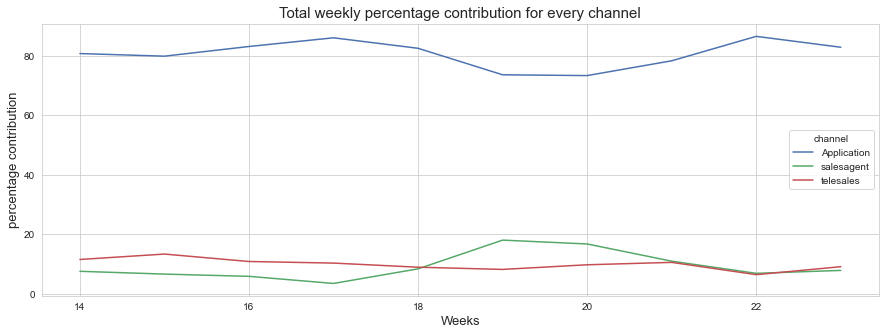

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(x="week", y="pct_contr", hue="channel", data=pct_contr_channel_weekly)
plt.xlabel('Weeks',fontsize=13)
plt.ylabel('percentage contribution',fontsize=13)
plt.title('Total weekly percentage contribution for every channel', fontsize=15);

### Validating weekly percentage contribution of every channel with Python:

In [31]:
use_cols = ['week', 'month', 'sales_order_id', 'channel']
delivered_orders = select_columns(dataset1[(dataset1['sales_order_status'] == 'Delivered') & (dataset1['month'] != 6)], use_cols)

In [32]:
orders_per_channel = delivered_orders.groupby(['month', 'week', 'channel'])['sales_order_id'].count()
orders_per_week = delivered_orders.groupby(['month', 'week'])['sales_order_id'].count()
channels_contributions = orders_per_channel.divide(orders_per_week) * 100
channels_contributions

month  week  channel    
4      14    Application    80.794702
             salesagent      7.615894
             telesales      11.589404
       15    Application    79.918746
             salesagent      6.674405
             telesales      13.406849
       16    Application    83.170254
             salesagent      5.919765
             telesales      10.909980
       17    Application    86.090858
             salesagent      3.533371
             telesales      10.375771
       18    Application    81.719597
             salesagent      9.295120
             telesales       8.985283
5      18    Application    89.156627
             salesagent      1.807229
             telesales       9.036145
       19    Application    73.659794
             salesagent     18.092784
             telesales       8.247423
       20    Application    73.393461
             salesagent     16.798196
             telesales       9.808343
       21    Application    78.364269
             salesagent  

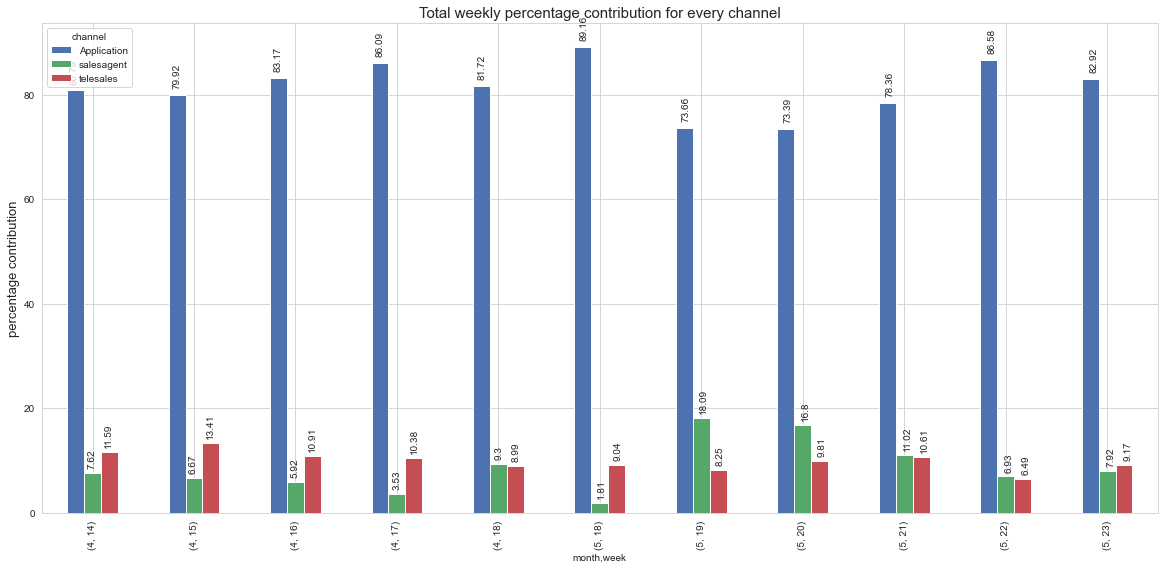

In [33]:
ax = channels_contributions.unstack().plot.bar(figsize=(20, 9))
for p in ax.patches:
    bar_length = round(p.get_height(), 2)
    ax.annotate(str(bar_length), (p.get_x() * 1.005, bar_length * 1.005),
                textcoords='offset points',
                xytext=(7.5, 4.5),
                ha='center',
                va='bottom',
                rotation=90)

plt.ylabel('percentage contribution',fontsize=13)
plt.title('Total weekly percentage contribution for every channel', fontsize=15);

App users are obviously the dominant here.

## 5. Calculate the total monthly percentage of App users and telesales users from the total retailers of May.

###### ·         App users are:
    o   Retailers who have at least 2 monthly delivered app orders (channel application)
    o   Retailers who 75%+ of their total delivered monthly orders on the App (channel application)

###### ·         Telesales users are:
    o   Retailers who have at least 2 monthly delivered telesales orders (channel telesales)
    o   Retailers who have their last delivered order channel telesales

In [34]:
query = '''
    WITH app_base AS 
        (SELECT retailer_id,
                month,
                COUNT(DISTINCT sales_order_id) as monthly_orders,
                COUNT(DISTINCT CASE WHEN channel = 'Application' THEN sales_order_id END) AS app_monthly_orders
        FROM dataset1
        WHERE sales_order_status = 'Delivered'
        GROUP BY 1,2),
        
    app_users AS
        (SELECT  retailer_id,
                 month,
                 monthly_orders,
                 app_monthly_orders
                 
         FROM app_base
         WHERE app_monthly_orders/monthly_orders >= 0.75 OR app_monthly_orders >= 2),
        
    telesales_base AS 
        (SELECT retailer_id,
                month,
                channel,
                sales_order_id,
                COUNT(CASE WHEN channel = 'telesales' THEN sales_order_id END)
                over(partition by retailer_id, month) AS telesales_monthly_orders,
                ROW_NUMBER() OVER(PARTITION BY retailer_id ORDER BY creation_date DESC) AS users_rank_per_order      
                
         FROM dataset1
         WHERE sales_order_status = 'Delivered'),
    
    telesales_users AS
        (SELECT retailer_id,
                month
                --COUNT(DISTINCT CASE WHEN channel = 'telesales' THEN sales_order_id END) AS telesales_monthly_orders      
                
        FROM telesales_base
        WHERE (users_rank_per_order = 1 and channel = 'telesales') or telesales_monthly_orders >=2),

        retailers AS
        (SELECT month,
                COUNT(DISTINCT retailer_id) AS total_retailers
                
        FROM dataset1
        WHERE sales_order_status = 'Delivered' AND month = 5
        GROUP BY 1),
        
        all_retailers AS
        (SELECT  t.month,
                 COUNT(DISTINCT t.retailer_id) AS telesales_users,
                 COUNT(DISTINCT a.retailer_id) AS app_users
                 
        FROM telesales_users t 
        JOIN app_users a on t.month = a.month
        WHERE t.month = 5
        GROUP BY 1)
        
SELECT  (100.0 * telesales_users) / (total_retailers) AS telesales_pct,
        (100.0 * app_users) / (total_retailers)  AS app_pct
            
FROM all_retailers AS a
JOIN retailers AS r ON r.month = a.month
 '''
total_monthly_percentage_app_telesales = ps.sqldf(query)
total_monthly_percentage_app_telesales

,telesales_pct,app_pct
0,7.70396,71.261632


This result based on criteria; the retailer who have at least 2 orders for any month.  both of (app,telesales)

# Mention techniques by which we can increase the app users percentage.

1. Introduce set of offers only for app users specially the sign-up offers, this will give good results in increasing app users' percentage.


2. Customized offers: mobile applications can be used to collect huge amounts of data that can be analyzed to set customized offers for each customer using machine learning and recommendation modules that will lead to more engagement to the app and increase the app user percentage.


3. Launch marketing campaigns for marketing the app.


4. Technical aspect:  push notifications for offers, in app messages, intuitive design and technical support etc. can have a significant impact on the user engagement.


### The total monthly percentage of App and telesales users from the total retailers with Python Q5:

In [35]:
use_cols = ['month', 'creation_date', 'sales_order_id', 'retailer_id', 'channel']
delivered_orders = select_columns(dataset1[(dataset1['sales_order_status'] == 'Delivered')], use_cols).reset_index(drop=True)

**Common criteria between app users and telesales users**

In [36]:
# active_retailers: retailers who have at least 2 monthly delivered orders (on any channel)
gp_per_channel_filter = delivered_orders.groupby(['retailer_id', 'month', 'channel'])['sales_order_id'] \
                                    .transform('count') >= 2
    
active_retailers = delivered_orders[gp_per_channel_filter].reset_index(drop=True)
active_retailers.head(3)

,month,creation_date,sales_order_id,retailer_id,channel
0,4,2020-04-01,1,18564,Application
1,4,2020-04-01,5,28140,Application
2,4,2020-04-01,13,19299,Application


**App users specific criteria**

In [37]:
monthly_sales_orders_per_retailer = active_retailers.groupby(['retailer_id', 'month'])['sales_order_id'].transform('count')

monthly_app_sales_orders_per_retailer = active_retailers[active_retailers['channel'] == 'Application'] \
    .groupby(['retailer_id', 'month'])['sales_order_id'].transform('count')

app_users_criteria = (monthly_app_sales_orders_per_retailer / monthly_sales_orders_per_retailer) > 0.75

**Telesales users specific criteria**

In [38]:
telesales_users_criteria_untransformed = active_retailers.sort_values(by=['creation_date']) \
    .drop_duplicates(subset='retailer_id', keep='last')['channel'] == 'telesales'

telesales_users_criteria = telesales_users_criteria_untransformed.reindex(list(range(0, active_retailers.index.max()+1)), fill_value=False)

In [39]:
active_retailers['is_telesale_user'] = telesales_users_criteria
active_retailers['is_app_user'] = app_users_criteria

active_retailers.head(3)

,month,creation_date,sales_order_id,retailer_id,channel,is_telesale_user,is_app_user
0,4,2020-04-01,1,18564,Application,False,True
1,4,2020-04-01,5,28140,Application,False,True
2,4,2020-04-01,13,19299,Application,False,True


### Calculate the total monthly percentage of App users and telesales users from the total retailers of May

In [40]:
all_may_retailers = dataset1[dataset1['month'] == 5]['retailer_id'].count()
may_app_user_retailers = sum(active_retailers[active_retailers['month'] == 5]['is_app_user'])
may_telesale_retailers = sum(active_retailers[active_retailers['month'] == 5]['is_telesale_user'])

avg_app_users = 100 * (may_app_user_retailers / all_may_retailers)
avg_telesale_users = 100 * (may_telesale_retailers / all_may_retailers)

avg_app_users, avg_telesale_users

(36.33280852609907, 1.126317064309071)

## 6.  Calculate the projection of total sales orders and total revenues (sum of order price) for the rest of June for every retailer and hence, total June.

There are many approaches here and all are reasonable here I will take two approaches of them

1- As data is not quite large and retailers orders are scattered. Then taking average monthly orders is reasonable so, the approach will be as follows:
    (total_sales_orders, total_revenue) per retailer, per month (4, 5, 6*2)  "the rest of June *2" then take the mean
    and after having the avg. total orders and avg. total revenues for each retailer (this is the forecasting for June)
    we will minus both (total orders & total revenues for the first 15 days) -  (avg of total orders & total revenues) and
    this is the rest of June for every retailer
    
2- This one is more likely based on retailers behaviour as general. retailers tend to follow the same pattern of ordering every month either its they buy goods at the end of the month or at the beginning of the month, they usually follow the same pattern.
So it will be more reasonable to make forecasting based on average month-days (1..30) of the total 2.5 months
so if a retailer has a single sales order for every day of the 3 months (assuming all months have equal days of 30) then the total number of sales will be 3*30=90 sales orders so for the last half of June average sales orders will be 1 (avg per day) and so one.

All said but at the end these both assumptions are naiive and the data is quite small and scattered to have such forecasting, it needs real feature engineering and maybe if data is low we can use data augmentation but again this will affect the overall result.

I looked up and found many approaches for time series forecasting such as (Exponential Smoothing, SARIMA, Deep learning models) that take in the consideration the different component of time series (trend – cycle-seasonal variation). Using historical sales average for forecasting may be less accurate compared to more sophisticated algorithm. however the main reason for applying this method here is the nature data, without any information regarding seasonality and trend, even the advance algorithm will result in a poor performance and will be computationally expensive, this is why using average seems to be a good choices in this case.

**First approach**

In [41]:
query = '''
        WITH base AS(
        SELECT   month,
                 retailer_id,
                 CASE WHEN month = 4 THEN COUNT(sales_order_id) END AS  APRIL_total_orders,
                 CASE WHEN month = 5 THEN COUNT(sales_order_id) END AS  MAY_total_orders,
                 CASE WHEN month = 6 THEN COUNT(sales_order_id)*2 END AS  JUNE_total_orders,
                 CASE WHEN month = 4 THEN SUM(order_price_before_discount) END AS APRIL_total_revenue,
                 CASE WHEN month = 5 THEN SUM(order_price_before_discount) END AS MAY_total_revenue,
                 CASE WHEN month = 6 THEN SUM(order_price_before_discount)*2 END AS JUNE_total_revenue
        FROM dataset1
        WHERE sales_order_status = 'Delivered' -- and retailer_id = 129
        GROUP BY 1,2),
        
        main AS
       (SELECT  retailer_id,
                SUM(CASE WHEN month   = 4 THEN APRIL_total_orders
                           WHEN month = 5 THEN MAY_total_orders
                           WHEN month = 6 THEN JUNE_total_orders END) *1.00 AS total_sales_orders,
                
                SUM(CASE WHEN month   = 4 THEN APRIL_total_revenue
                           WHEN month = 5 THEN MAY_total_revenue
                           WHEN month = 6 THEN JUNE_total_revenue END) *1.00 AS total_revenues
        FROM base
        GROUP BY 1),
        
        june_base AS
        (SELECT month,
                retailer_id,
                CASE WHEN month = 6 THEN COUNT(sales_order_id) END AS  current_JUNE_total_orders,
                CASE WHEN month = 6 THEN SUM(order_price_before_discount) END AS current_JUNE_total_revenue
        
        FROM dataset1
        WHERE sales_order_status = 'Delivered'  -- and retailer_id = 129
        GROUP BY 1,2),
        
        avg_orders_revenues AS
        (SELECT retailer_id,
                SUM(total_sales_orders) *1.0 / 3.0 AS avg_total_sales_orders_retailer,
                SUM(total_revenues) / 3.0 AS avg_total_revenues_retailer
        
        FROM main
        GROUP BY 1),
    
    forecast_orders_rev AS
    (SELECT  o.retailer_id,
            (avg_total_sales_orders_per_month) - COALESCE(current_JUNE_total_orders,0) AS forecast_total_orders_rest_of_june,
            (avg_total_revenues) - COALESCE(current_JUNE_total_revenue,0) AS forecast_total_revenues_rest_of_june
        
    FROM avg_orders_revenues AS o
    JOIN june_base AS j ON j.retailer_id = o.retailer_id
    GROUP BY 1
    )
    
    SELECT *
    FROM avg_orders_revenues
    
        '''

avg_orders_revenues = ps.sqldf(query)
avg_orders_revenues

,retailer_id,avg_total_sales_orders_retailer,avg_total_revenues_retailer
0,68,0.333333,351.766667
1,73,0.333333,594.400000
2,80,0.333333,285.166667
3,85,0.666667,5586.616667
4,90,0.333333,460.950000
...,...,...,...
8351,40742,0.666667,591.333333
8352,40745,0.666667,548.833333
8353,40753,0.666667,565.133333
8354,40770,0.666667,621.333333


In [42]:
query = '''
        SELECT  d.retailer_id,
                COUNT(d.sales_order_id) AS total_orders,
                SUM(d.order_price_before_discount) AS total_revenues
                
        FROM dataset1 AS d
        LEFT JOIN avg_orders_revenues AS r ON d.retailer_id = r.retailer_id
        WHERE sales_order_status = 'Delivered' AND month = 6
        GROUP by 1
        '''

xx = ps.sqldf(query)
xx

,retailer_id,total_orders,total_revenues
0,120,1,1199.05
1,129,1,13049.75
2,209,2,3051.00
3,217,1,830.75
4,230,1,2171.50
...,...,...,...
3288,40742,1,887.00
3289,40745,1,823.25
3290,40753,1,847.70
3291,40770,1,932.00


In [43]:
query = '''
with base AS(
        SELECT  month,
                retailer_id,
                AVG(order_price_before_discount) AS REV,
                COUNT(DISTINCT sales_order_id) AS total_retailers
                
                     
        FROM dataset1
        WHERE sales_order_status = 'Delivered'
        GROUP BY 1,2)
        
        select  month,   
                avg(total_retailers) ats -- (1.4)
        from base
        GROUP BY 1
'''

ats = ps.sqldf(query)
ats

,month,ats
0,4,1.647488
1,5,1.463320
2,6,1.260856


In [44]:
query = '''
        WITH base AS (
        SELECT  month,
                retailer_id,
                COUNT(DISTINCT sales_order_id) AS total_orders_retailer_monthly,
                SUM(order_price_before_discount) AS total_rev_retailer_monthly
                
        FROM dataset1
        WHERE sales_order_status = 'Delivered'
        GROUP by 1,2),
        
        total_orders_month AS
        (SELECT month,
                COUNT(DISTINCT sales_order_id) AS total_orders_monthly,
                SUM(order_price_before_discount) AS total_rev_monthly
                
         FROM dataset1
         WHERE sales_order_status = 'Delivered'
         GROUP BY 1
        )
        SELECT  b.month,
                b.retailer_id,
                ((total_orders_retailer_monthly*1.0) /(total_orders_monthly*1.0)) * 100 AS pct_contr_total_orders,
                ((total_rev_retailer_monthly*1.0) /(total_rev_monthly*1.0)) * 100 AS pct_contr_total_rev
        
        FROM base AS b
        JOIN total_orders_month AS om ON b.month = om.month
        GROUP BY 1,2
        order by 2 
        '''

pct_contr = ps.sqldf(query)
pct_contr

,month,retailer_id,pct_contr_total_orders,pct_contr_total_rev
0,4,68,0.013432,0.004689
1,4,73,0.013432,0.007924
2,4,80,0.013432,0.003802
3,4,85,0.013432,0.030189
4,5,85,0.014789,0.056172
...,...,...,...,...
12428,6,40742,0.024085,0.008838
12429,6,40745,0.024085,0.008203
12430,6,40753,0.024085,0.008447
12431,6,40770,0.024085,0.009287


not complete.

**Second approach**

In [45]:
use_cols = ['creation_date', 'month', 'sales_order_id', 'retailer_id', 'order_price_before_discount']
projection_df = select_columns(dataset1, use_cols)

In [46]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    dates = []
    for n in range(int((end_date - start_date).days) + 1):
        dates.append(start_date + timedelta(n))
        
    return dates
        
def populate_the_second_half_of_june_month_with(projection_df):
    import random
    num_retailers = len(projection_df.retailer_id.unique().tolist())
    retailers_ids = projection_df.retailer_id.values.tolist()
    month = [6] * num_retailers
    sales_order_id = [None] * num_retailers
    order_price_before_discount = [0] * num_retailers
    
    start_date = date(2020, 6, 16)
    end_date = date(2020, 6, 30)
    
    fake_df = pd.DataFrame()
    dates = daterange(start_date, end_date)
    i = 0
    while i < len(dates):
        day_date = pd.Timestamp(dates[i])
        creation_date = [day_date] * num_retailers
        data = {
            'creation_date': creation_date,
            'month': month,
            'sales_order_id': sales_order_id,
            'retailer_id': num_retailers,
            'order_price_before_discount': order_price_before_discount,
        }
        created_df = pd.DataFrame(data)
        fake_df = pd.concat([fake_df, created_df])
        i += 1
    return fake_df

In [47]:
fake_df = populate_the_second_half_of_june_month_with(projection_df)
populated_df = pd.concat([projection_df, fake_df])

populated_df['month_day_num'] = populated_df['creation_date'].astype(str).apply(lambda x : x[-2:]) # extract day num from creation date
populated_df['day_of_week'] = populated_df['creation_date'].dt.strftime("%A")
populated_df["month_day_num"] = pd.to_numeric(populated_df["month_day_num"]) # convert obj types to int.

populated_df.head(3)

,creation_date,month,sales_order_id,retailer_id,order_price_before_discount,month_day_num,day_of_week
0,2020-04-01,4,1,18564,2119.75,1,Wednesday
1,2020-04-01,4,5,28140,2242.75,1,Wednesday
2,2020-04-01,4,9,32552,1094.50,1,Wednesday


**Retailers estimated orders for the rest of june**

In [48]:
all_retailers_orders = populated_df.groupby(['retailer_id']).agg({"sales_order_id": "count",
                                                                  "order_price_before_discount": "sum"})

retailers_orders_per_month_day = populated_df.groupby(['retailer_id', 'month_day_num']).agg({"sales_order_id": "count",
                                                                                          "order_price_before_discount": "sum"})

retailers_avg_orders_per_month_day = retailers_orders_per_month_day.divide(all_retailers_orders)

last_half_of_the_month_filter = (retailers_avg_orders_per_month_day.index.get_level_values('month_day_num') > 15) & (retailers_avg_orders_per_month_day.index.get_level_values('month_day_num') <= 30)

retailers_avg_orders_of_rest_of_june = retailers_avg_orders_per_month_day.loc[last_half_of_the_month_filter]

retailers_estimated_orders_for_rest_of_june = (retailers_avg_orders_of_rest_of_june * all_retailers_orders) \
    .groupby('retailer_id').agg({"sales_order_id": "count", "order_price_before_discount": "sum"})

retailers_estimated_orders_for_rest_of_june

,sales_order_id,order_price_before_discount
retailer_id,,
68,1,1055.30
85,1,6793.60
90,1,1382.85
96,2,22021.00
109,1,3935.00
...,...,...
38927,1,930.00
38935,1,6517.00
38942,1,4586.75


**Retailers orders for the first half of june**

In [49]:
first_half_of_the_month_filter = (projection_df['creation_date'] >= "2020-06-1") & (projection_df['creation_date'] <= "2020-06-15")

retailers_orders_for_first_half_of_june = projection_df[first_half_of_the_month_filter] \
    .groupby(['retailer_id']).agg({"sales_order_id": "count", "order_price_before_discount": "sum"})

retailers_orders_for_first_half_of_june

,sales_order_id,order_price_before_discount
retailer_id,,
98,1,3636.50
120,1,1199.05
129,1,13049.75
209,2,3051.00
217,1,830.75
...,...,...
40745,1,823.25
40753,1,847.70
40758,1,933.30


### June Orders

In [50]:
june_orders = pd.merge(retailers_orders_for_first_half_of_june, retailers_estimated_orders_for_rest_of_june, left_index=True, right_index=True)

june_orders['total_num_orders'] = june_orders['sales_order_id_x'] + june_orders['sales_order_id_y']
june_orders['total_revenue'] = june_orders['order_price_before_discount_x'] + june_orders['order_price_before_discount_y']

june_orders.rename(columns={
    "sales_order_id_x": "june_first_half_num_orders",
    "order_price_before_discount_x": "june_first_half_revenue",
    "sales_order_id_y": "june_second_half_num_orders",
    "order_price_before_discount_y": "june_second_half_revenue",
}, inplace=True)

june_orders

,june_first_half_num_orders,june_first_half_revenue,june_second_half_num_orders,june_second_half_revenue,total_num_orders,total_revenue
retailer_id,,,,,,
120,1,1199.05,1,2354.60,2,3553.65
359,1,3371.30,2,10929.65,3,14300.95
387,2,2589.90,5,9834.55,7,12424.45
495,2,7057.50,1,3098.05,3,10155.55
567,1,5594.50,1,4177.50,2,9772.00
...,...,...,...,...,...,...
38685,1,2161.50,1,5007.60,2,7169.10
38689,1,4807.00,1,4220.05,2,9027.05
38767,1,3439.75,1,3775.30,2,7215.05


In [51]:
# june_orders.to_csv("june_orders_projection.csv", sep=',', encoding='utf-8')

---

<a id='dataset2' style="font-size:25px; color:#1D2951; text-decoration:none;"><b>Dataset 2</b></a>

In [52]:
dataset2_skus_cats = pd.concat(pd.read_excel('dataset2.xlsx', sheet_name=[0]), ignore_index=True)
dataset2_beg_balances = pd.concat(pd.read_excel('dataset2.xlsx', sheet_name=[1]), ignore_index=True)
dataset2_sales = pd.concat(pd.read_excel('dataset2.xlsx', sheet_name=[2]), ignore_index=True)
dataset2_sensitivity = pd.concat(pd.read_excel('dataset2.xlsx', sheet_name=[3]), ignore_index=True)

In [53]:
dataset2_skus_cats.head(2)

,Product id,Category,Super Category,Sector
0,2,معلبات,groceries,Food
1,3,معلبات,groceries,Food


In [54]:
#rename product_id cols:

dataset2_skus_cats.rename(columns={'Product id':'product_id'}, inplace=True)
dataset2_sales.rename(columns={'product id':'product_id'}, inplace=True)
dataset2_sensitivity.rename(columns={'Product  ID':'product_id'}, inplace=True)

In [55]:
# replace space with underscore in column names

dataset2_skus_cats.columns = dataset2_skus_cats.columns.str.replace(' ','_')
dataset2_beg_balances.columns = dataset2_beg_balances.columns.str.replace(' ','_')
dataset2_sales.columns = dataset2_sales.columns.str.replace(' ','_')
dataset2_sensitivity.columns = dataset2_sensitivity.columns.str.replace(' ','_')

frame = [dataset2_skus_cats,dataset2_beg_balances,dataset2_sales,dataset2_sensitivity]

In [56]:
dataset2_sales.head(5)

,date,sales_order_id,product_id,item_price,purchased_item_count,sales_price
0,2021-09-03 18:20:00,1267247,130,148.5,6,891.0
1,2021-09-03 13:54:00,1266312,2287,114.0,1,114.0
2,2021-09-03 13:54:00,1266312,2423,52.0,1,52.0
3,2021-09-03 13:54:00,1266312,3115,341.0,1,341.0
4,2021-09-03 13:54:00,1266312,2308,109.0,1,109.0


In [57]:
dataset2_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87273 entries, 0 to 87272
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  87273 non-null  datetime64[ns]
 1   sales_order_id        87273 non-null  int64         
 2   product_id            87273 non-null  int64         
 3   item_price            87273 non-null  float64       
 4   purchased_item_count  87273 non-null  int64         
 5   sales_price           87273 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 4.0 MB


### 7. please calculate the total sales, total COGS and margin per SKU, category, super category and sector.

In [58]:
query = '''
    SELECT  sc.product_id,
            SUM(purchased_item_count) AS volume,    
            SUM(item_price * purchased_item_count) AS sales,
            SUM(WAC * purchased_item_count) AS COGS,
                
            (SUM(item_price * purchased_item_count) - SUM(WAC * purchased_item_count))/ SUM(item_price * purchased_item_count)
                AS margin
                
        FROM dataset2_skus_cats AS sc
        JOIN dataset2_beg_balances AS b ON sc.product_id = b.product_id
        JOIN dataset2_sales AS s ON sc.product_id = s.product_id
        GROUP BY 1
        '''
Per_SKU = ps.sqldf(query)
Per_SKU

,product_id,volume,sales,COGS,margin
0,3,919,58134.50,57189.370,0.016258
1,9,121,34974.50,34091.750,0.025240
2,10,966,84078.00,82109.034,0.023418
3,11,36,1998.72,1952.046,0.023352
4,12,115,6388.80,6229.320,0.024962
...,...,...,...,...,...
1281,3709,177,11505.00,11182.860,0.028000
1282,3710,2,270.00,262.440,0.028000
1283,3711,1,135.00,132.030,0.022000
1284,3713,2,556.00,543.768,0.022000


In [59]:
query = '''
        SELECT  sc.Category,
                SUM(purchased_item_count) AS volume,
             --   SUM(item_price) AS item_price,
                SUM(item_price * purchased_item_count) AS sales,
              --  SUM(item_price) * SUM(purchased_item_count) AS sales2,                
                SUM(WAC * purchased_item_count) AS cost,
                (SUM(item_price * purchased_item_count) - SUM(WAC * purchased_item_count))/ SUM(item_price * purchased_item_count)
                AS margin
                
        FROM dataset2_skus_cats AS sc
        JOIN dataset2_beg_balances AS b ON sc.product_id = b.product_id
        JOIN dataset2_sales AS s ON sc.product_id = s.product_id
        GROUP BY 1
        '''

Per_CATEGORY = ps.sqldf(query)
Per_CATEGORY

,Category,volume,sales,cost,margin
0,أدوات حلاقة,1964,2.854835e+04,2.684511e+04,0.059662
1,أرز,1165,5.718782e+04,5.597846e+04,0.021147
2,ألبان,2752,2.371950e+05,2.307179e+05,0.027307
3,اعشاب,17981,2.230945e+05,2.141535e+05,0.040077
4,الفوط الصحية,849,2.060293e+04,1.942151e+04,0.057342
5,بسكويت و معمول,5814,3.142472e+05,2.966112e+05,0.056121
6,بطاريات ولمبات,126,1.073864e+04,1.002369e+04,0.066578
7,بقوليات,6110,1.566597e+05,1.521697e+05,0.028661
8,توابل وبهارات,4070,3.166242e+05,3.070673e+05,0.030184
9,جبن,13056,4.667367e+05,4.233340e+05,0.092992


In [60]:
query = '''
        SELECT  sc.super_category,
                SUM(purchased_item_count) AS volume,
             --   SUM(item_price) AS item_price,
                SUM(item_price * purchased_item_count) AS sales,
              --  SUM(item_price) * SUM(purchased_item_count) AS sales2,                
                SUM(WAC * purchased_item_count) AS COGS,
                (SUM(item_price * purchased_item_count) - SUM(WAC * purchased_item_count))/ SUM(item_price * purchased_item_count)
                AS margin
                
        FROM dataset2_skus_cats AS sc
        JOIN dataset2_beg_balances AS b ON sc.product_id = b.product_id
        JOIN dataset2_sales AS s ON sc.product_id = s.product_id
        GROUP BY 1
        '''

Per_Super = ps.sqldf(query)
Per_Super

,Super_Category,volume,sales,COGS,margin
0,Consumables and Batteries,5225,3.773794e+05,3.597781e+05,0.046641
1,Dairy Products,15808,7.039317e+05,6.540519e+05,0.070859
2,Detergents,51839,3.139093e+06,3.015016e+06,0.039526
3,Diapers and Papers,13143,3.666012e+05,3.408912e+05,0.070131
4,Drinks,124591,3.929604e+06,3.804757e+06,0.031771
5,Hygiene,900,2.738797e+04,2.547372e+04,0.069894
6,Main Food,33784,1.679504e+06,1.627684e+06,0.030854
7,Personal Care,25081,1.421126e+06,1.348890e+06,0.050830
8,Scratch Cards,470,5.015350e+04,4.700171e+04,0.062843
9,Snacks and Candy,34571,1.540537e+06,1.444198e+06,0.062536


In [61]:
query = '''
    SELECT  sc.sector,
            SUM(purchased_item_count) AS volume,
            --   SUM(item_price) AS item_price,
            SUM(item_price * purchased_item_count) AS sales,
            SUM(WAC * purchased_item_count) AS COGS,
            (SUM(item_price * purchased_item_count) - SUM(WAC * purchased_item_count))/ SUM(item_price * purchased_item_count)
                AS margin
                
    FROM dataset2_skus_cats AS sc
    JOIN dataset2_beg_balances AS b ON sc.product_id = b.product_id
    JOIN dataset2_sales AS s ON sc.product_id = s.product_id
    GROUP BY 1
        '''

Per_Sector = ps.sqldf(query)
Per_Sector

,Sector,volume,sales,COGS,margin
0,Airtime,470,5.015350e+04,4.700171e+04,0.062843
1,Food,277684,1.150693e+07,1.107271e+07,0.037735
2,Non-Food,96188,5.331587e+06,5.090049e+06,0.045303


### 8. Considering the Stock snapshot and the sales data per SKU, Calculate days on hand for all SKUs (time remaining till SKUs run out of stock) at the end of each day.

In [62]:
# DOH = (Avg. stock * 365/COGS)

# DOH = AVG(stock - purchased_item_count) / ((wac * purchased_item_count) * 365)

# ((1547 +2466) /2) / (57189.37 / 365)

In [63]:
query = '''
        SELECT  s.product_id,
            --     (AVG(stock) * 365) / SUM(b.WAC * s.purchased_item_count) AS DOH2,
                (AVG(stock - purchased_item_count)) / (SUM(b.WAC * s.purchased_item_count) / 365) AS DOH
                
        FROM dataset2_sales AS s
        JOIN dataset2_beg_balances AS b ON b.product_id = s.product_id
        GROUP BY 1
        '''

DOH_Per_SKU = ps.sqldf(query)
DOH_Per_SKU

,product_id,DOH
0,3,15.726361
1,9,2.279557
2,10,8.025273
3,11,14.809077
4,12,13.356074
...,...,...
1281,3709,11.732634
1282,3710,10.152797
1283,3711,17.001818
1284,3713,7.585036


### 9. please recalculate the previously mentioned margins and DOH when the price of SKUs 309, 112 and 176 decrease by 5% while the price of SKUs 429, 130 and 326 increase by 3%

In [64]:
# margin haykon (sales-cogs)/sales   -- COGS = COST

In [65]:
query = '''
        SELECT  sc.product_id,
                CASE WHEN sc.product_id IN (309, 112, 176) THEN SUM((item_price * 0.95)* purchased_item_count)
                     WHEN sc.product_id IN (429, 130, 326) THEN SUM((item_price * 1.03)* purchased_item_count)
                     ELSE 0 END AS sales,
          
                SUM(WAC * purchased_item_count) AS COGS,
                
                -- # Margin = (Sales - COGS) /  Sales
                
                (CASE WHEN sc.product_id IN (309, 112, 176) THEN SUM((item_price * 0.95)* purchased_item_count)
                     WHEN sc.product_id IN (429, 130, 326) THEN SUM((item_price * 1.03)* purchased_item_count)
                     ELSE 0 END - SUM(WAC * purchased_item_count)) / CASE WHEN sc.product_id IN (309, 112, 176) 
                         THEN SUM((item_price * 0.95)* purchased_item_count)
                     WHEN sc.product_id IN (429, 130, 326) THEN SUM((item_price * 1.03)* purchased_item_count)
                     ELSE 0 END AS margin,
                     
                (AVG(stock - purchased_item_count)) / (SUM(b.WAC * s.purchased_item_count) / 365) AS DOH
             --    (AVG(stock) * 365) / SUM(WAC * purchased_item_count) AS DOH2
                
        FROM dataset2_skus_cats AS sc
        JOIN dataset2_beg_balances AS b ON sc.product_id = b.product_id
        JOIN dataset2_sales AS s ON sc.product_id = s.product_id
        WHERE sc.product_id IN (309, 112, 176, 429, 130, 326)
        GROUP BY 1
        '''

Per_SKU_Q9 = ps.sqldf(query)
Per_SKU_Q9

,product_id,sales,COGS,margin,DOH
0,112,121355.3750,123627.13750,-0.018720,46.919535
1,130,310957.5150,287711.17650,0.074757,4.671291
2,176,120301.8250,122516.48400,-0.018409,9.324900
3,309,127500.6875,130006.28875,-0.019652,31.461072
4,326,589982.9700,561343.02000,0.048544,6.369231
5,429,184290.8548,171513.00000,0.069335,10.065839


In [66]:
# Per_SKU_Q9.to_csv("Per_SKU_Q9.csv", sep=',', encoding='utf-8')